# Welcome to Colab!

STEP 1: LOADING DATA
Success: File 'SuperMarket Analysis(1).csv' loaded successfully.
Dataset Shape: 1000 Rows, 17 Columns

STEP 2: INSPECTING DATA

--- First 5 Rows ---
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/201

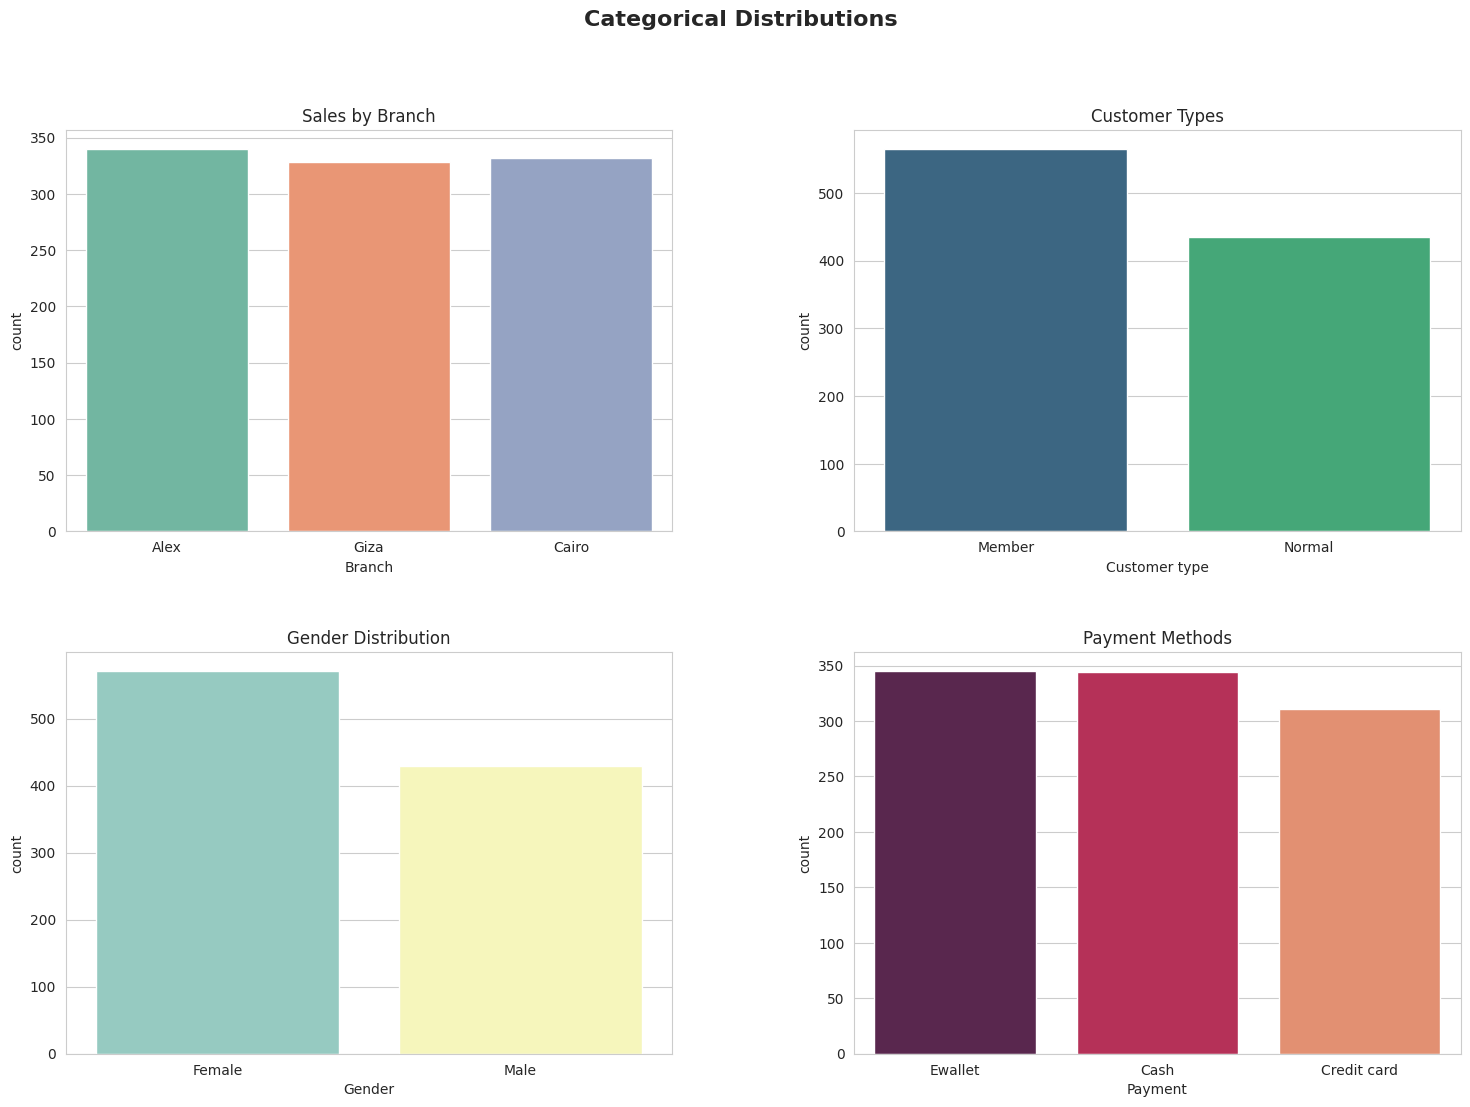

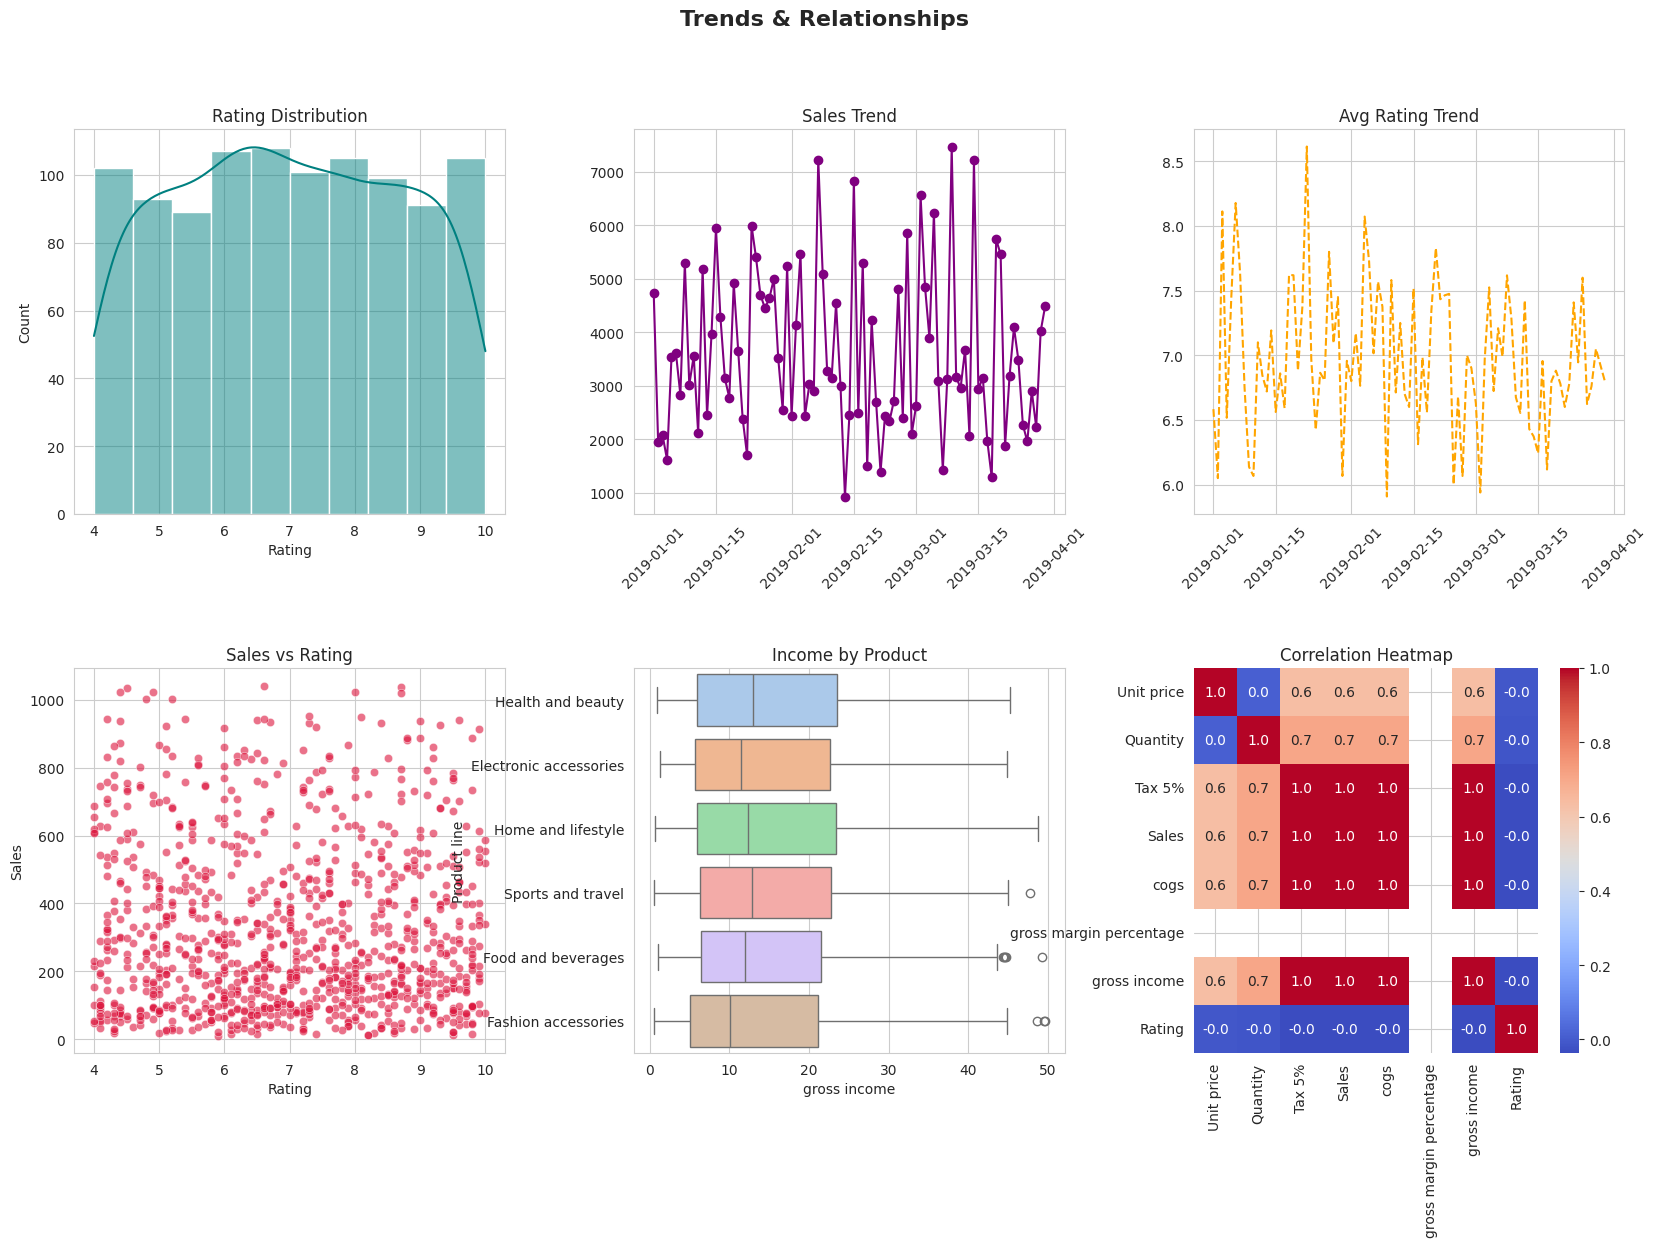

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

def load_dataset(file_path):
    print("="*60)
    print("STEP 1: LOADING DATA")
    print("="*60)

    try:
        df = pd.read_csv(file_path)
        print(f"Success: File '{file_path}' loaded successfully.")
        print(f"Dataset Shape: {df.shape[0]} Rows, {df.shape[1]} Columns")
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        sys.exit()
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        sys.exit()

def inspect_data(df):
    print("\n" + "="*60)
    print("STEP 2: INSPECTING DATA")
    print("="*60)

    print("\n--- First 5 Rows ---")
    print(df.head())

    print("\n--- DataFrame Info ---")
    print(df.info())

    print("\n--- Descriptive Statistics ---")
    print(df.describe())

    print("\n--- MISSING VALUES ---")
    print(df.isnull().sum())

    print("\n--- UNIQUE VALUES  ---")
    print(f"Cities ({df['City'].nunique()}): {df['City'].unique()}")
    print(f"Branches ({df['Branch'].nunique()}): {df['Branch'].unique()}")
    print(f"Payment Methods ({df['Payment'].nunique()}): {df['Payment'].unique()}")

def clean_data(df):
    print("\n" + "="*60)
    print("STEP 3: DATA CLEANING")
    print("="*60)

    initial_shape = df.shape
    df_clean = df.dropna()
    dropped_count = initial_shape[0] - df_clean.shape[0]
    print(f"Cleaning process: Dropped {dropped_count} rows containing missing values.")

    if 'Date' in df_clean.columns:
        df_clean['Date'] = pd.to_datetime(df_clean['Date'])
        print("Data Type Adjustment: Converted 'Date' column to datetime format.")

    return df_clean

def generate_summary_tables(df):
    print("\n" + "="*60)
    print("STEP 4: DETAILED STATISTICAL TABLES (BY CATEGORY)")
    print("="*60)

    categories = ['Branch', 'Customer type', 'Gender', 'Payment', 'Product line']

    for cat in categories:
        print(f"\n>>> STATISTICAL TABLE FOR: {cat.upper()} <<<")
        summary_table = df.groupby(cat).agg({
            'Invoice ID': 'count',
            'Sales': ['sum', 'mean', 'median', 'max', 'min'],
            'Rating': 'mean',
            'gross income': 'sum'
        })
        summary_table.columns = ['Count', 'Total Sales', 'Avg Sales', 'Median Sales', 'Max Sales', 'Min Sales', 'Avg Rating', 'Total Income']
        summary_table = summary_table.round(2)
        print(summary_table)
        print("-" * 60)

def answer_advanced_questions(df):
    print("\n" + "="*60)
    print("Analytical Questions")
    print("="*60)

    print("\nQ1: Which branch generates the highest revenue?")
    branch_rev = df.groupby('Branch')['Sales'].sum().sort_values(ascending=False)
    print(f">> Top Branch: '{branch_rev.index[0]}' with Sales: {branch_rev.iloc[0]:,.2f}")


    print("\nQ2: Do members spend more than normal customers?")
    avg_spend = df.groupby('Customer type')['Sales'].mean()
    print(f">> Average Spending:\n{avg_spend}")
    if avg_spend['Member'] > avg_spend['Normal']:
        print(">> Result: Yes, Members spend more.")
    else:
        print(">> Result: No, Normal customers spend more.")


    print("\nQ3: Which payment method has the highest usage?")
    payment_counts = df['Payment'].value_counts()
    print(f">> Top Payment: '{payment_counts.index[0]}' with {payment_counts.iloc[0]} transactions.")


    print("\nQ4: Which product line has the highest average rating?")
    avg_rating = df.groupby('Product line')['Rating'].mean().sort_values(ascending=False)
    print(f">> Top Product Line: '{avg_rating.index[0]}' with Avg Rating: {avg_rating.iloc[0]:.2f}")


    print("\nQ5: Is there a relationship between unit price and quantity?")
    corr = df['Unit price'].corr(df['Quantity'])
    print(f">> Correlation: {corr:.4f}")
    if abs(corr) < 0.1:
        print(">> Interpretation: No significant relationship.")
    else:
        print(">> Interpretation: There is a relationship.")

def create_visualizations(df):
    print("\n" + "="*60)
    print("6 VISUALIZATION")
    print("="*60)

    fig1, axes1 = plt.subplots(2, 2, figsize=(18, 12))
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    fig1.suptitle('Categorical Distributions', fontsize=16, fontweight='bold')


    sns.countplot(ax=axes1[0, 0], x='Branch', data=df, hue='Branch', palette='Set2')
    axes1[0, 0].set_title('Sales by Branch')

    sns.countplot(ax=axes1[0, 1], x='Customer type', data=df, hue='Customer type', palette='viridis')
    axes1[0, 1].set_title('Customer Types')

    sns.countplot(ax=axes1[1, 0], x='Gender', data=df, hue='Gender', palette='Set3')
    axes1[1, 0].set_title('Gender Distribution')

    sns.countplot(ax=axes1[1, 1], x='Payment', data=df, hue='Payment', palette='rocket')
    axes1[1, 1].set_title('Payment Methods')
    plt.show()

    fig2, axes2 = plt.subplots(2, 3, figsize=(20, 12))
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    fig2.suptitle('Trends & Relationships', fontsize=16, fontweight='bold')

    sns.histplot(ax=axes2[0, 0], data=df['Rating'], bins=10, kde=True, color='teal')
    axes2[0, 0].set_title('Rating Distribution')

    daily_sales = df.groupby('Date')['Sales'].sum()
    axes2[0, 1].plot(daily_sales.index, daily_sales.values, color='purple', marker='o')
    axes2[0, 1].set_title('Sales Trend')
    axes2[0, 1].tick_params(axis='x', rotation=45)

    daily_rating = df.groupby('Date')['Rating'].mean()
    axes2[0, 2].plot(daily_rating.index, daily_rating.values, color='orange', linestyle='--')
    axes2[0, 2].set_title('Avg Rating Trend')
    axes2[0, 2].tick_params(axis='x', rotation=45)

    sns.scatterplot(ax=axes2[1, 0], x='Rating', y='Sales', data=df, color='crimson', alpha=0.6)
    axes2[1, 0].set_title('Sales vs Rating')


    sns.boxplot(ax=axes2[1, 1], x='gross income', y='Product line', data=df, hue='Product line', palette='pastel')
    axes2[1, 1].set_title('Income by Product')

    numeric_df = df.select_dtypes(include=[np.number])
    sns.heatmap(ax=axes2[1, 2], data=numeric_df.corr(), annot=True, fmt=".1f", cmap='coolwarm')
    axes2[1, 2].set_title('Correlation Heatmap')
    plt.show()

dataset_filename = 'SuperMarket Analysis(1).csv'

df = load_dataset(dataset_filename)
inspect_data(df)
df_clean = clean_data(df)

generate_summary_tables(df_clean)
answer_advanced_questions(df_clean)
create_visualizations(df_clean)